<a href="https://colab.research.google.com/github/Maheshkumar145/DL_Theory/blob/main/DL_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.	Is it OK to initialize all the weights to the same value as long as that value is selected randomly using He initialization?**

**Ans:**Even with different input if all weights are the same, all units in hidden layer will be the same too. This is the main issue with symmetry and reason why you should initialize weights randomly or, at least, with different values. This affects all architectures that use each-to-each connections

**2.	Is it OK to initialize the bias terms to 0?**

**Ans:**There will no issues if bias is 0 because non-zero weights take care of breaking the symmetry and even if bias is 0, the values in every neuron will still be different.

**3.	Name three advantages of the SELU activation function over ReLU?**

**Ans:**

**a.**SELU does not have vanishing gradient problem and hence, is used in deep neural networks.

**b.**SELUs learn faster and better than other activation functions without needing further procession.

**c.**SELUs cannot die.


**4.	In which cases would you want to use each of the following activation functions: SELU, leaky ReLU (and its variants), ReLU, tanh, logistic, and softmax?**

**Ans:**

**1.SELUs** are activation functions that induce self-normalizing properties.

**2.Leaky ReLU** is used when a small slope for negative values is required instead of a flat slope.

**3.Tanh** activation function results in higher values of gradient during training and higher updates in the weights of the network. So, if we want strong gradients and big learning steps, we should use the tanh activation function.

**4.Logistic** is used for models where we have to predict the probability as an output i.e., in range of 0 to 1.

**5.Softmax** is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.


**5.	What may happen if you set the momentum hyperparameter too close to 1 (e.g., 0.99999) when using an SGD optimizer?**

**Ans:** Algorithm will likely pick up a lot of speed, hopefully moving roughly toward the global minimum, but its momentum will carry it right past the minimum.

**6.	Name three ways you can produce a sparse model?**

**Ans:** Image processing,Object recoginition,General supervised learning.

**7.	Does dropout slow down training? Does it slow down inference (i.e., making predictions on new instances)? What about MC Dropout?**

**Ans:** Yes it will slowdown training because while backpropogation there wont be that ommitted neuron so it will take time to training.

Dropout does work in inference time during training time, dropout randomly sets node values to zero.

Monte Carlo dropout (MC-Dropout) is one of the most well-known techniques to quantify uncertainty in deep learning methods.It provides a scalable way to learn a predictive distribution.

**8.Practice training a deep neural network on the CIFAR10 image dataset:**

**a.	Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function.**

**b.	Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.**

**c.	Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?**

**d.	Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).**

**e.	Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
print('X_train.shape  :', X_train.shape)
print('Y_train.shape  :', Y_train.shape)
print('X_test.shape   :', X_test.shape)
print('Y_test.shape   :', Y_test.shape)

X_train.shape  : (50000, 32, 32, 3)
Y_train.shape  : (50000, 1)
X_test.shape   : (10000, 32, 32, 3)
Y_test.shape   : (10000, 1)


In [4]:
def print_long_list(x, n_items=7, str_len=15):
    print('len:', len(x))
    for i in range(0, len(x), n_items):
        for j in x[i:min(i+n_items, len(x))]:
            print(str('{0: <'+str(str_len)+'}').format(str(j)), end=' ')
        print()

In [5]:
def get_datatypes(df):
    dtypes_col, dtypes_cnt = {}, {}
    for col in df:
        x = str(df[col].dtype)
        if x not in dtypes_col:
            dtypes_col[x] = [col]
            dtypes_cnt[x] = 1
        else:
            dtypes_col[x] += [col]
            dtypes_cnt[x] += 1
    return dtypes_cnt, dtypes_col

In [6]:
dtypes_cnt, dtypes_col = get_datatypes(X_train)
dtypes_cnt

{'uint8': 50000}

In [7]:
dtypes_cnt, dtypes_col = get_datatypes(X_test)
dtypes_cnt

{'uint8': 10000}

In [8]:
dtypes_cnt, dtypes_col = get_datatypes(Y_train)
dtypes_cnt

{'uint8': 50000}

In [9]:
dtypes_cnt, dtypes_col = get_datatypes(Y_test)
dtypes_cnt

{'uint8': 10000}

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


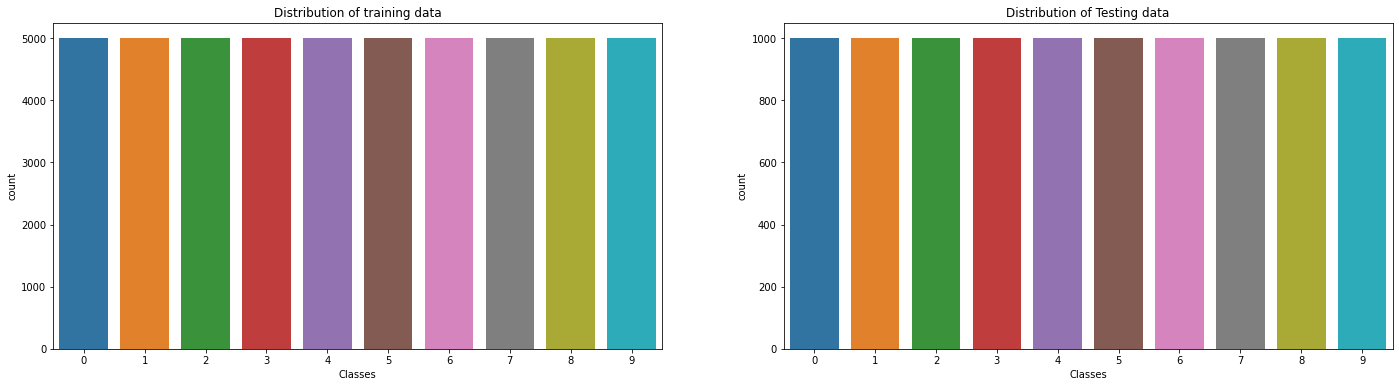

In [10]:
fig, axs = plt.subplots(1,2,figsize=(24,6)) 
# Count plot for training set
sns.countplot(Y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(Y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [11]:
print('X_train.shape  :', X_train.shape)
print('Y_train.shape  :', Y_train.shape)
print('X_test.shape   :', X_test.shape)
print('Y_test.shape   :', Y_test.shape)

X_train.shape  : (50000, 32, 32, 3)
Y_train.shape  : (50000, 1)
X_test.shape   : (10000, 32, 32, 3)
Y_test.shape   : (10000, 1)


In [12]:
X_train = X_train / 255.0
X_test  = X_test  / 255.0

In [13]:
print('X_train.shape  :', X_train.shape)
print('Y_train.shape  :', Y_train.shape)
print('X_test.shape   :', X_test.shape)
print('Y_test.shape   :', Y_test.shape)

X_train.shape  : (50000, 32, 32, 3)
Y_train.shape  : (50000, 1)
X_test.shape   : (10000, 32, 32, 3)
Y_test.shape   : (10000, 1)
